In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [5]:
df.shape

(545, 13)

U ovoj laboratorijskoj vježbi koristi se dataset housing.csv, koji sadrži podatke o karakteristikama stambenih objekata i njihovim cijenama.

Varijable uključuju:

površinu objekta ('area')

broj spavaćih soba i kupaonica ('bedrooms', 'bathrooms')

broj katova ('stories')

parkirna mjesta ('parking')

binarne pokazatelje (npr. 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea')

kategorijsku varijablu 'furnishingstatus'

ciljnu varijablu 'price'

Dataset sadrzi 545 redaka, nema NA vrijednosti.


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
num_cols = [
"area",
"bedrooms",
"bathrooms",
"stories",
"parking",
"price",
]
df_num = df[num_cols]
df_num.median()

,0
area,4600.0
bedrooms,3.0
bathrooms,1.0
stories,2.0
parking,0.0
price,4340000.0


In [10]:
df_num.mode()

,area,bedrooms,bathrooms,stories,parking,price
0,6000.0,3.0,1.0,2.0,0.0,3500000
1,NaN,NaN,NaN,NaN,NaN,4200000


In [11]:
df_num.std()

,0
area,2.170141e+03
bedrooms,7.380639e-01
bathrooms,5.024696e-01
stories,8.674925e-01
parking,8.615858e-01
price,1.870440e+06


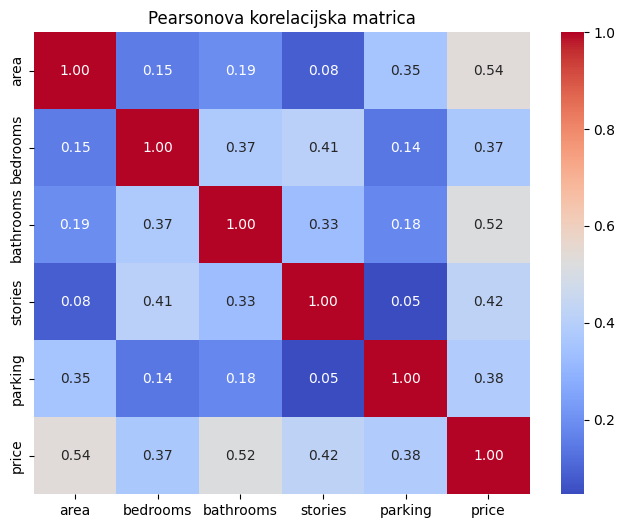

In [12]:
corr_pearson = df[num_cols].corr(method="pearson")
plt.figure(figsize=(8, 6))
sns.heatmap(corr_pearson, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearsonova korelacijska matrica")
plt.show()

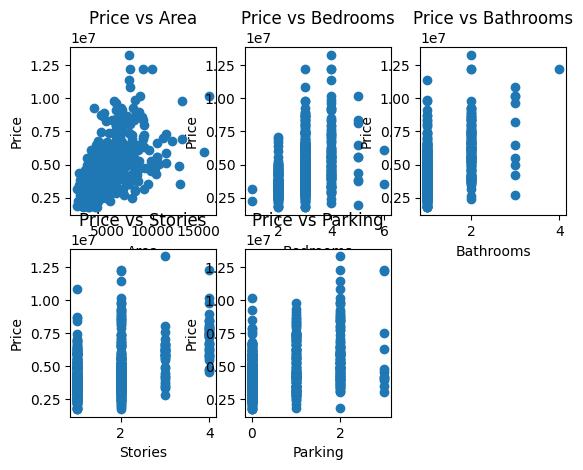

In [25]:
plt.subplot(2, 3, 1)
plt.scatter(df['area'], df['price'])
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')

plt.subplot(2, 3, 2)
plt.scatter(df['bedrooms'], df['price'])
plt.title('Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.subplot(2, 3, 3)
plt.scatter(df['bathrooms'], df['price'])
plt.title('Price vs Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')

plt.subplot(2, 3, 4)
plt.scatter(df['stories'], df['price'])
plt.title('Price vs Stories')
plt.xlabel('Stories')
plt.ylabel('Price')

plt.subplot(2, 3, 5)
plt.scatter(df['parking'], df['price'])
plt.title('Price vs Parking')
plt.xlabel('Parking')
plt.ylabel('Price')

plt.show()

Iz izračunate korelacijske matrice numerickih varijabli vidimo da povrsina prostora najvise pozitivno korelira s cijenom. Kako raste povrsina, tako raste i cijena.

Ostale varijable koje jako koreliraju s cijenom su broj kupatila i broj katova.

S cijenom najmanje korelira varijabla koja prikazuje broj soba

Iz scatter grafova mozemo vidjeti da cijena i povrsina prostora imaju linearnu ovisnost. Kada gledamo ostale numericke varijable i kako cijena ovisi o njima, ne mozemo zakljuciti da li je to linearna ovisnost.

In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ohe = OneHotEncoder()
le = LabelEncoder()

df_encoded = df.copy()

df_encoded['mainroad'] = le.fit_transform(df['mainroad'])
df_encoded['guestroom'] = le.fit_transform(df['guestroom'])
df_encoded['basement'] = le.fit_transform(df['basement'])
df_encoded['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df_encoded['airconditioning'] = le.fit_transform(df['airconditioning'])
df_encoded['prefarea'] = le.fit_transform(df['prefarea'])

furnishingstatus = df['furnishingstatus']
furnishingstatus_encoded = ohe.fit_transform(df[['furnishingstatus']]).toarray().astype(int)
df_encoded = df_encoded.join(pd.DataFrame(furnishingstatus_encoded, columns=['furnished', 'semi-furnished', 'unfurnished']))
df_encoded.drop('furnishingstatus', axis=1, inplace=True)
df_encoded

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


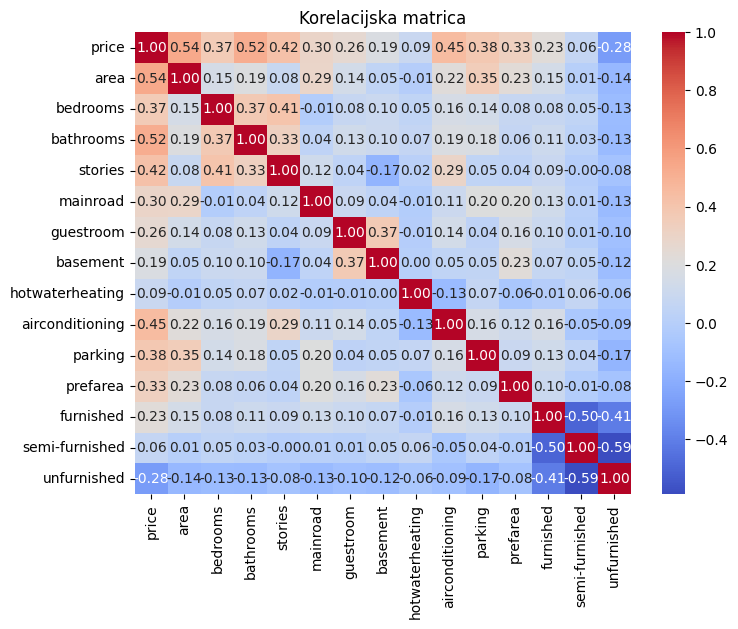

In [57]:
corr = df_encoded.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelacijska matrica")
plt.show()



Pet najvećih korelacija s price varijablom:

area, bathrooms, airconditioning, stories, parking

Zbog najveće korelacija, ovih pet komponenti bi bile najbolje za uzeti pri izradi modela


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_data_calc(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

df_encoded_reduced = df_encoded.copy()
df_encoded_reduced.drop(['semi-furnished', 'price', 'bedrooms'], axis=1, inplace=True)

vif_data = vif_data_calc(df_encoded_reduced)
vif_data

,feature,VIF
0,area,7.641659
1,bathrooms,7.848594
2,stories,6.267661
3,mainroad,6.678221
4,guestroom,1.464085
5,basement,1.903539
6,hotwaterheating,1.090327
7,airconditioning,1.748472
8,parking,1.979317
9,prefarea,1.486973


furnished, semi-furnished i unfurnished su jako povezane tako da bi njih trebalo izbaciti iz skupa značajki.

In [56]:
X = df_encoded_reduced

y = df_encoded["price"]

# Dodati konstantu
X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     94.34
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          3.14e-123
Time:                        11:46:39   Log-Likelihood:                -8332.8
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     532   BIC:                         1.675e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.244e+05   2.04e+05     

R^2 = 0.68

68% varijance cijene opisano je odabranim varijablama. Ostalih 40% opisano je drugim faktorima.